# Introduction

Hi fellow kagglers! This is my first notebook on Kaggle, so I will gladly accept any feedback on the topic :)
Linear optimization is widely used for economical and technical problems, for instance, production tasks, transportation strategy and even diet planning! Those can be easily solved with Solver tool in Excel, but what if there is a large amount of variables? There comes handy PuLP package in Python, which helps in finidng solutions much faster.

# Example of optimization model

> Let's assume that we are managing a big facility related to large-scale production. For the production of two types of products A and B the company uses three types of raw materials. Consumption rates for each type of raw material for the production of a single product unit are shown in the table below. The profit from the sales of each type of product unit and the total amount of raw materials that can be used by the enterprise are shown in the same table. 

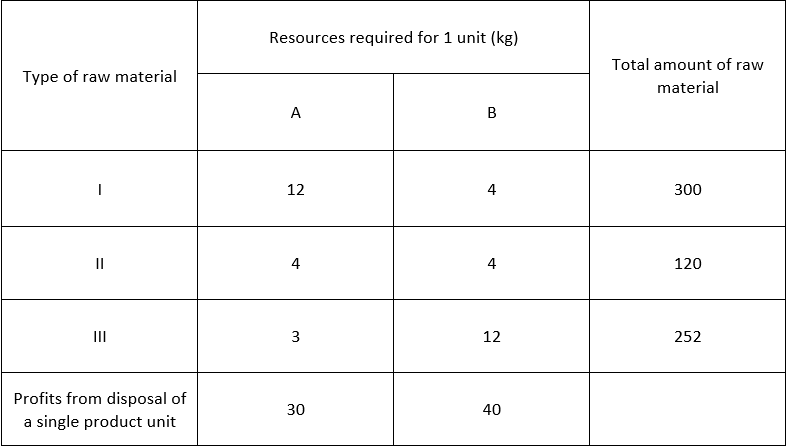

We will set the produced amounts of each product type as x (for product A) and y (for product B) - our *decision variables*. In linear programming, the values for decision variables are always greater than or equal to 0. An *objective function* will be the main goal of the task - maximising the profit, it will be marked as Z in the solution. Total amount of raw material will be used as *constraints*, or restrictions on decision variables, baceause we can not more materials than we have available.
We need to maximize function ***Z = 30x + 40y*** with following constraints:
*12x + 4y <= 300 (type 1 of material)
4x + 4y <= 120 (type 2 of material)
3x + 12y <= 252 (type 3 of material)
x >= 0, y >= 0*

# Getting started

Installing PuLP package in Kaggle notebooks may be challenging, but you can try installing older versions of PuLP package, it helped in this case:

In [22]:
!pip install -Iv pulp==1.6.8

Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-ofvi5_lk
Created temporary directory: /tmp/pip-req-tracker-lt7iqdju
Initialized build tracking at /tmp/pip-req-tracker-lt7iqdju
Created build tracker: /tmp/pip-req-tracker-lt7iqdju
Entered build tracker: /tmp/pip-req-tracker-lt7iqdju
Created temporary directory: /tmp/pip-install-eknx2b6f
1 location(s) to search for versions of pulp:
* https://pypi.org/simple/pulp/
Fetching project page and analyzing links: https://pypi.org/simple/pulp/
Getting page https://pypi.org/simple/pulp/
Found index url https://pypi.org/simple
Getting credentials from keyring for https://pypi.org/simple
Getting credentials from keyring for pypi.org
Looking up "https://pypi.org/simple/pulp/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/pulp/ HTTP/1.1" 304 0
  Found link https://files.pythonhosted.org/packages/34

  Added pulp==1.6.8 from file:///root/.cache/pip/wheels/ef/80/90/298f850e9f5e1f1a41725c8b632c8652f4085a81f2374683db/PuLP-1.6.8-py3-none-any.whl to build tracker '/tmp/pip-req-tracker-lt7iqdju'
  Removed pulp==1.6.8 from file:///root/.cache/pip/wheels/ef/80/90/298f850e9f5e1f1a41725c8b632c8652f4085a81f2374683db/PuLP-1.6.8-py3-none-any.whl from build tracker '/tmp/pip-req-tracker-lt7iqdju'
1 location(s) to search for versions of pyparsing:
* https://pypi.org/simple/pyparsing/
Fetching project page and analyzing links: https://pypi.org/simple/pyparsing/
Getting page https://pypi.org/simple/pyparsing/
Found index url https://pypi.org/simple
Getting credentials from keyring for https://pypi.org/simple
Getting credentials from keyring for pypi.org
Looking up "https://pypi.org/simple/pyparsing/" in the cache
Request header has "max_age" as 0, cache bypassed
https://pypi.org:443 "GET /simple/pyparsing/ HTTP/1.1" 304 0
  Found link https://files.pythonhosted.org/packages/51/35/bf0f20fdbce45b2555

  Skipping link: unsupported archive format: .exe: https://files.pythonhosted.org/packages/e4/ae/66f7bc7f71bbec526e10ba8d30fa9fc4f7369f3d281c4d5e8f1cfd0511f1/pyparsing-2.0.5.win32-py3.3.exe#sha256=8e179886ba1fea06cb52e7684a512feab5739d5d80709c7ac4988cb4b53a8adc (from https://pypi.org/simple/pyparsing/)
  Skipping link: unsupported archive format: .exe: https://files.pythonhosted.org/packages/ba/f2/2d5f00b5a4ee6334a39d80c946f5208922013a39c9876f3b84f18d5f14e9/pyparsing-2.0.5.win32-py3.4.exe#sha256=372adfc0c6b4e72fde281f71368f251fe131d4a194db5eb53d8b4cb570168713 (from https://pypi.org/simple/pyparsing/)
  Skipping link: unsupported archive format: .exe: https://files.pythonhosted.org/packages/55/10/1779c99c4ea99bc55add8dd4dba26ac4a7b6889bc6506f2d4dd3669cb1d7/pyparsing-2.0.5.win32-py3.5.exe#sha256=d4d442cc65fbdac92c4cd68beaa184decde762927d5f3b7646a579b5fd49acfb (from https://pypi.org/simple/pyparsing/)
  Found link https://files.pythonhosted.org/packages/f4/b3/522c4f0a103a4e48b821b89ce6756

Using version 2.4.7 (newest of versions: 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.1.7, 2.1.8, 2.1.9, 2.1.10, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1.1, 2.4.2, 2.4.3, 2.4.4, 2.4.5, 2.4.6, 2.4.7)
  Created temporary directory: /tmp/pip-unpack-wce4_0g4
  Getting credentials from keyring for files.pythonhosted.org
  Looking up "https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl" in the cache
  Current age based on date: 615
  Ignoring unknown cache-control directive: immutable
  Freshness lifetime from max-age: 365000000
  The response is "fresh", returning cached response
  365000000 > 615
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Added pyparsing>=2.0.1 from https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl#sha256=ef9d7

Import newly installed package:

In [23]:
import pulp as plp

# Optimization of the model

Create a maximization problem:

In [24]:
Lpproblem = plp.LpProblem('Problem', plp.LpMaximize) 

Define variables for problem, lowBound = 0 means that it is a non-negative value.

In [25]:
x = plp.LpVariable("x", lowBound = 0)   
y = plp.LpVariable("y", lowBound = 0)  

Now describe an objective function that we need to optimize:

In [26]:
Lpproblem += 30 * x + 40 * y 

Set constraints for the problem:

In [27]:
Lpproblem += 12 * x + 4 * y <= 300
Lpproblem += 4 * x + 4 * y <= 120
Lpproblem += 3 * x + 12 * y <= 252

Display the problem:

In [28]:
print(Lpproblem)

Problem:
MAXIMIZE
30*x + 40*y + 0
SUBJECT TO
_C1: 12 x + 4 y <= 300

_C2: 4 x + 4 y <= 120

_C3: 3 x + 12 y <= 252

VARIABLES
x Continuous
y Continuous



Now solve the problem and display the final solution (fist two values are amounts of product A and B that we need to produce and third value is our profit):

In [29]:
status = Lpproblem.solve()    
print("Model status: ", plp.LpStatus[status])   

print("Model solution: ", plp.value(x), plp.value(y), "Profit: ",plp.value(Lpproblem.objective)) 

Model status:  Optimal
Model solution:  12.0 18.0 Profit:  1080.0


# Conclusion

That's it! Looks easy, right? But if you use this for more complex models with hundreds of variables it may be a challenge to set them all in a PuLP model, I will share later an example of investment model with PuLP solver soon so that you can understand it. Thank you for reading this and hope you enjoyed my notebook! :)
